- NAMA: MUHAMMAD RIZKI NURFIQRI
- NIM: 1301204009

In [2]:
# Import semua pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import folium
from folium.plugins import HeatMap

In [3]:
pip install pandas matplotlib seaborn folium scikit-learn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/semester 7/fiqri visdat/WEEK 7 /Data Set 2.csv')
df

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382
5,6,DKI Jakarta,Jawa,JK,Jakarta,10012271,1353,598,51,31,106.853.027,-6.162.401
6,7,Gorontalo,Sulawesi,GO,Gorontalo,1115633,93,0,0,0,123.134.766,0.637194
7,8,Jambi,Sumatra,JA,Jambi,3344400,63,1,0,0,103.623.047,-1.625.758
8,9,Jawa Barat,Jawa,JB,Bandung,46029668,1306,98,14,5,107.633.057,-7.144.499
9,10,Jawa Tengah,Jawa,JT,Semarang,33522663,986,43,6,0,11.010.498,-72.099


In [6]:
# Konversi nilai yang berupa string ribuan menjadi numerik
df['longitude'] = df['longitude'].str.replace('.', '').astype(float) / 10000
df['latitude'] = df['latitude'].str.replace('.', '').astype(float) / 10000


<ipython-input-6-597d0542f169>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['longitude'] = df['longitude'].str.replace('.', '').astype(float) / 10000
<ipython-input-6-597d0542f169>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['latitude'] = df['latitude'].str.replace('.', '').astype(float) / 10000


In [7]:
# Peta Panas Kasus COVID-19
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)
heat_data = [[row['latitude'], row['longitude'], row['confirmed']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m.save('heatmap.html')

Text(0, 0.5, 'Populasi')

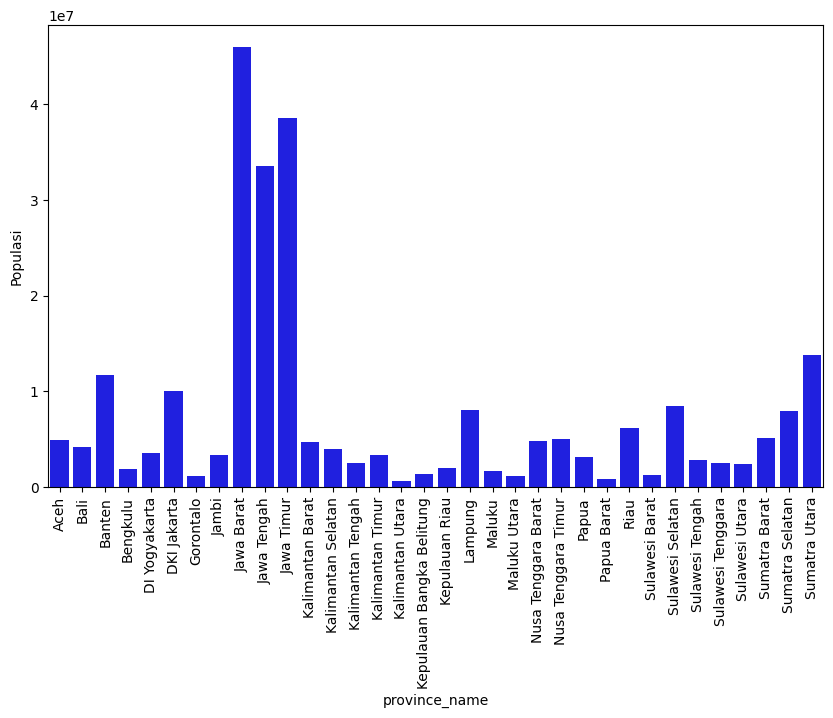

In [8]:
# Grafik Batang Populasi
plt.figure(figsize=(10,6))
sns.barplot(x='province_name', y='population', data=df, color='blue')
plt.xticks(rotation=90)
plt.ylabel('Populasi')

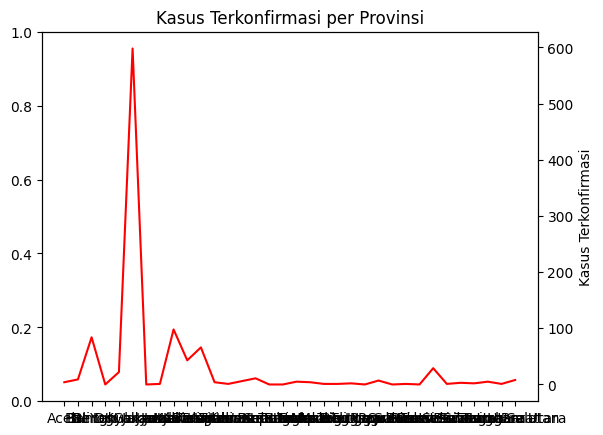

In [9]:
# Buat sumbu Kasus Terkonfirmasi
ax2 = plt.twinx()
sns.lineplot(x='province_name', y='confirmed', data=df, color='red', ax=ax2)
plt.xticks(rotation=90)
plt.ylabel('Kasus Terkonfirmasi')
plt.title('Kasus Terkonfirmasi per Provinsi')
plt.show()


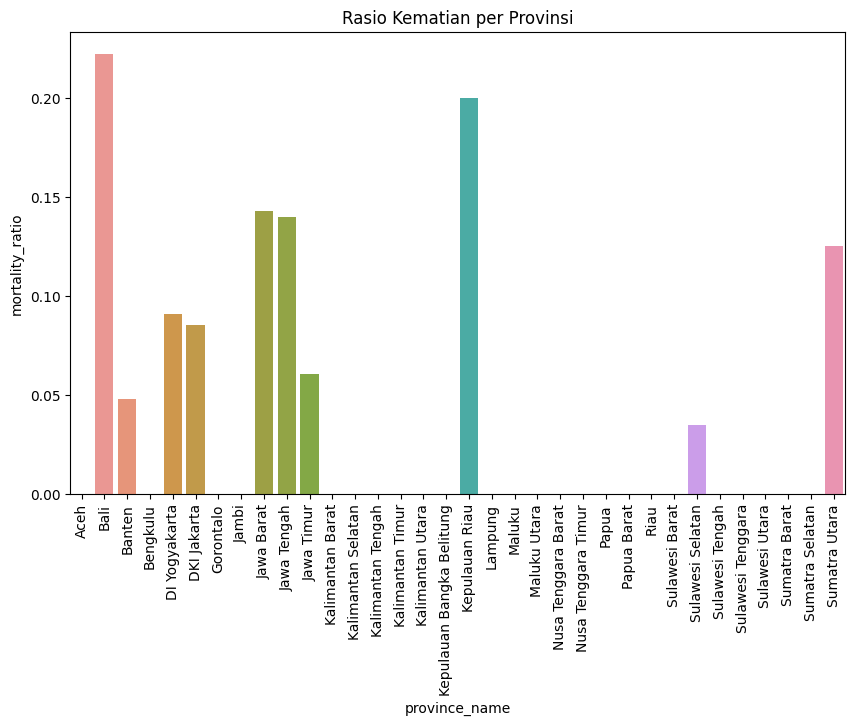

In [10]:
# Rasio Kematian
df['mortality_ratio'] = df['deceased'] / df['confirmed'].replace(0, 1)  # Menghindari pembagian dengan nol
plt.figure(figsize=(10,6))
sns.barplot(x='province_name', y='mortality_ratio', data=df)
plt.xticks(rotation=90)
plt.title('Rasio Kematian per Provinsi')
plt.show()

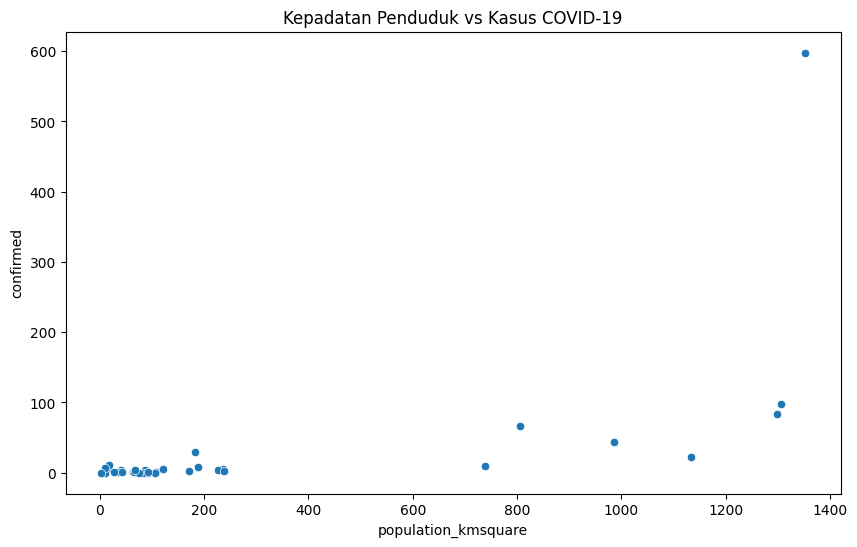

In [11]:
# Grafik Sebaran Kepadatan Penduduk dan Kasus COVID-19
plt.figure(figsize=(10,6))
sns.scatterplot(x='population_kmsquare', y='confirmed', data=df)
plt.title('Kepadatan Penduduk vs Kasus COVID-19')
plt.show()

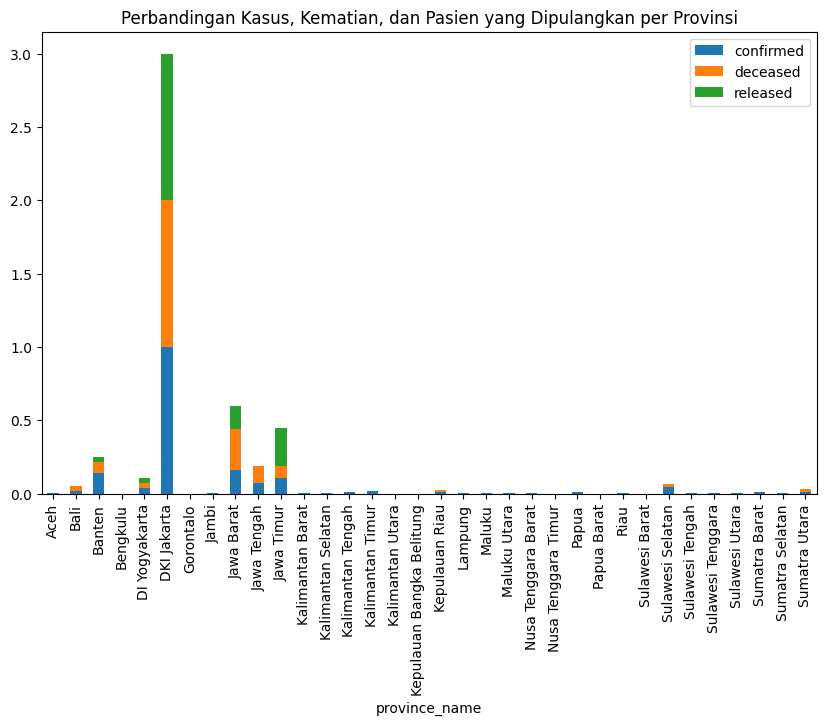

In [12]:
# Perbandingan Jumlah Kasus vs Jumlah Pasien yang Dipulangkan
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[['confirmed', 'deceased', 'released']] = scaler.fit_transform(df[['confirmed', 'deceased', 'released']])
df_scaled.set_index('province_name')[['confirmed', 'deceased', 'released']].plot(kind='bar', stacked=True, figsize=(10,6))
plt.xticks(rotation=90)
plt.title('Perbandingan Kasus, Kematian, dan Pasien yang Dipulangkan per Provinsi')
plt.show()